<a href="https://colab.research.google.com/github/AbeHandler/AbeHandler.github.io/blob/master/Chloropleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# I had trouble installing these locally so running on collab
# https://bookdown.org/alhdzsz/data_viz_ir/maps.html
# see also the eda folder in the Berin Github repo
install.packages("sf")
install.packages("rnaturalearth")
install.packages("tidyverse")

library(sf)
library(rnaturalearth)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”


### Steps

- First initialize the world.csv file

- Then build the worldplus file in the `eda` folder and upload it here


In [147]:
library(ggplot2)
write_csv(world, "world.csv")
world <- ne_countries(scale = "small", returnclass = "sf")
worldplus <- read_csv("worldplus2.csv")
world = left_join(world, worldplus, by="admin")
world = world %>% dplyr::mutate(count = replace_na(count, 0))

Rows: 160 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): admin
dbl (1): count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


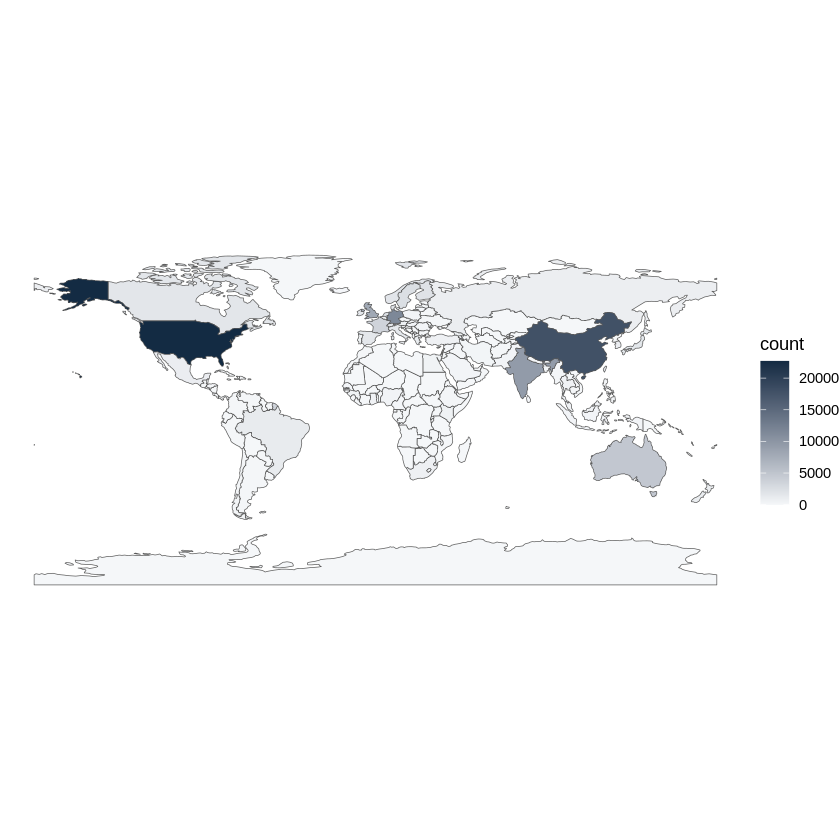

In [148]:
world %>% 
  ggplot() + 
  geom_sf(aes(fill = count)) +
  theme_void() + scale_fill_gradient(low = "#f5f7f9", high = "#132B43")